<a href="https://colab.research.google.com/github/TBFY/search-API/blob/master/notebooks/TBFY_Crosslingual_SearchAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A **cross-lingual search API** for exploring public contracts in the European Union

# Why?

[TheyBuyForYou](https://theybuyforyou.eu/) collects, annotates and organizes large amounts of public procurement data in the European Union.

Let's explore its content through a set of questions!

## What types of documents are available?

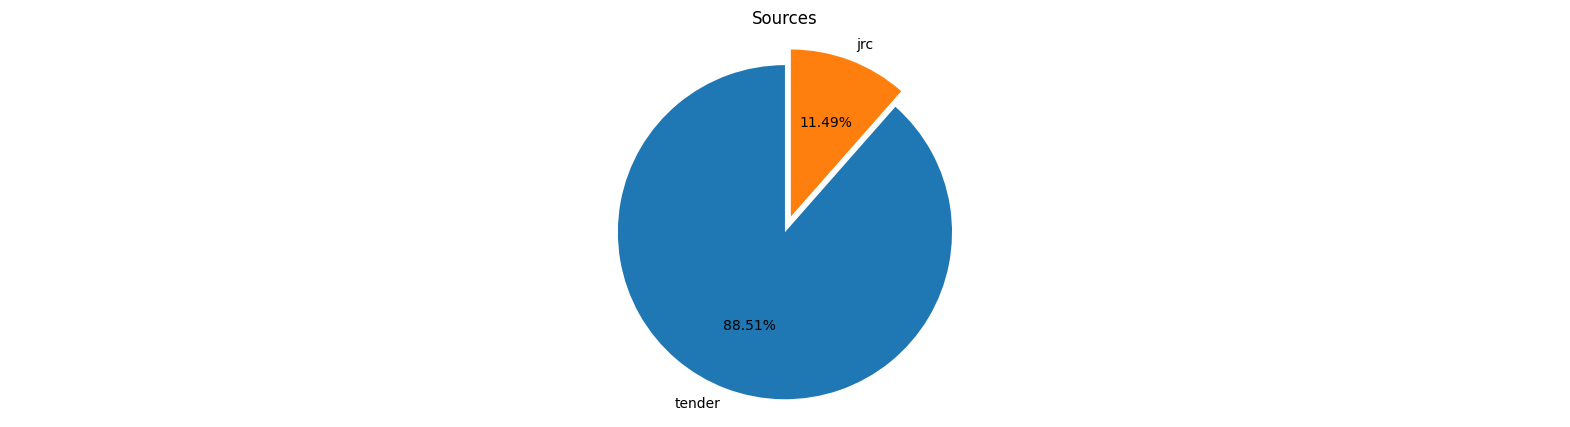

In [ ]:
import requests
import pandas as pd

params = {
    "facet.field":"source_s",
    "facet":"on",
    "q":"*:*"
}

url="http://librairy.linkeddata.es/data/tbfy/select"
resp = requests.get(url=url, params=params)
data = resp.json()
data_types = data['facet_counts']['facet_fields']['source_s']

data_sources = [lang for lang in data_types if isinstance(lang, str)][:-1]
frequencies = [freq for freq in data_types if isinstance(freq, int)][:-1]

#df = pd.DataFrame(frequencies, index=data_sources, columns=['x'])
 
#df.plot(kind='pie', subplots=True, figsize=(5, 5))


plt.pie(frequencies, labels=data_sources,
        startangle=90,
        explode = (0, 0.1),
        autopct = '%1.2f%%')

plt.axis('equal') 
plt.title('Sources')
plt.show()

## What are they about?

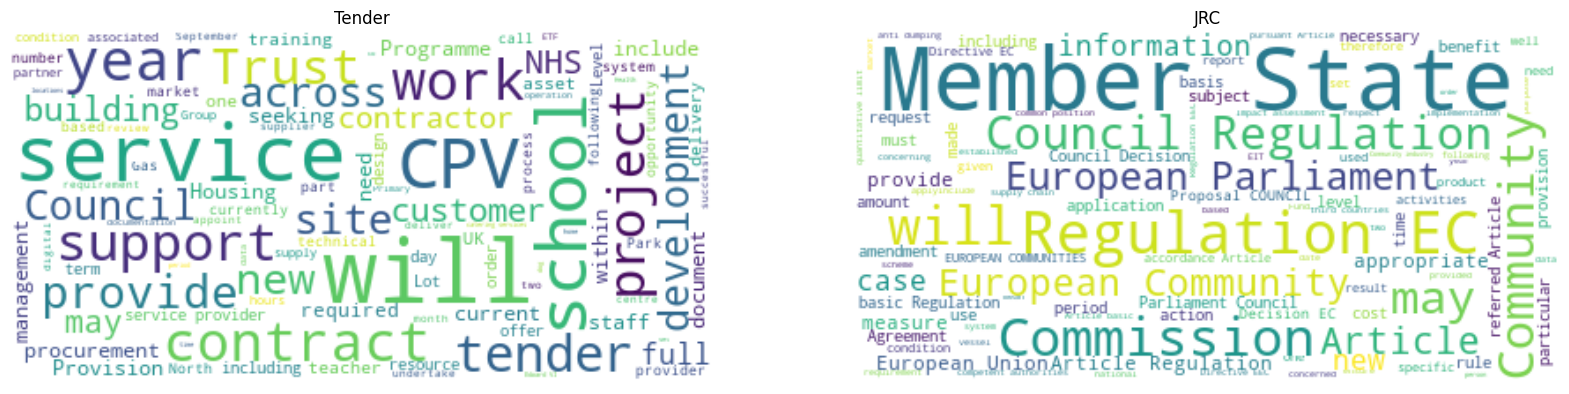

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import requests
import matplotlib.pyplot as plt
import numpy as np

def retrieve_texts(source):
  params = {
    "start":"0",
    "rows":"100",
    "fl":"txt_t",
    "q":"lang_s:en & source_s:"+source
  }
  url="http://librairy.linkeddata.es/data/tbfy/select"
  resp = requests.get(url=url, params=params)
  data = resp.json()
  texts = [txt['txt_t'] for txt in data['response']['docs'] ]
  text = ' '.join(texts)
  return text


plt.figure()

plt.subplot(1, 2, 1).set_title("Tender")
plt.plot()
plt.imshow(WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords = set(STOPWORDS)).generate(retrieve_texts("tender")), interpolation="bilinear")
plt.axis("off")

plt.subplot(1, 2, 2).set_title("JRC")
plt.plot()
plt.imshow(WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords = set(STOPWORDS)).generate(retrieve_texts("jrc")), interpolation="bilinear")
plt.axis("off")

plt.show()

## How many different languages are there?

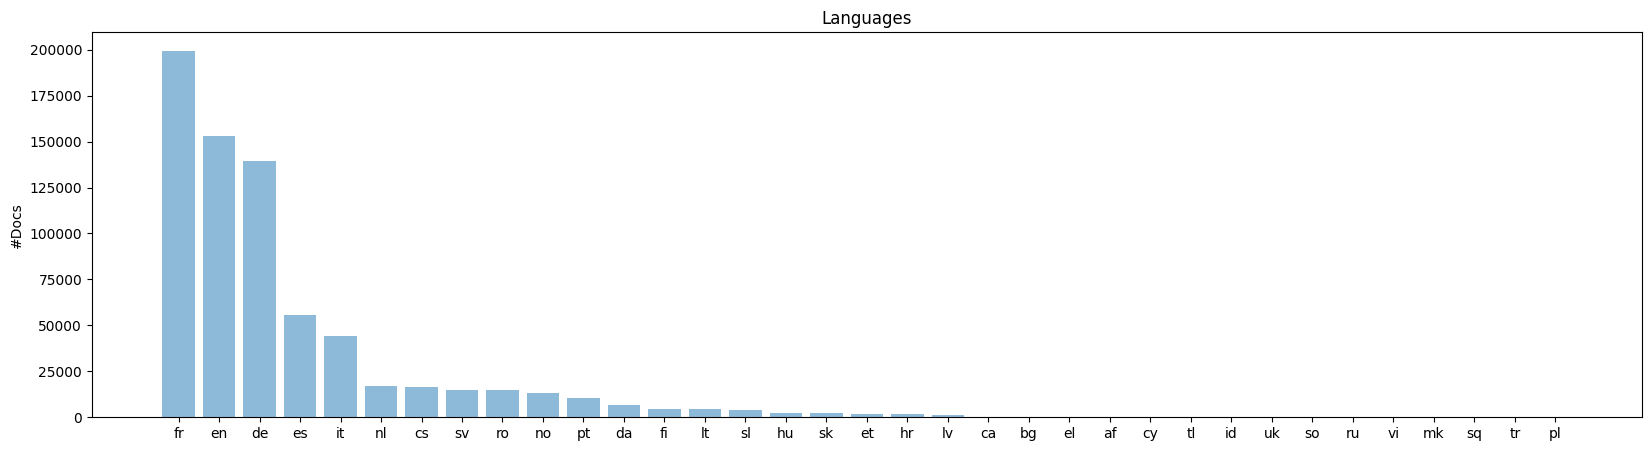

In [ ]:
import requests
import matplotlib.pyplot as plt
import numpy as np

params = {
    "facet.field":"lang_s",
    "facet":"on",
    "q":"*:*"
}

url="http://librairy.linkeddata.es/data/tbfy/select"
resp = requests.get(url=url, params=params)
data = resp.json()
language_data = data['facet_counts']['facet_fields']['lang_s']

languages = [lang for lang in language_data if isinstance(lang, str)]
y_pos = np.arange(len(languages))
frequencies = [freq for freq in language_data if isinstance(freq, int)]
plt.bar(y_pos, frequencies, align='center', alpha=0.5)

plt.xticks(y_pos, languages)
plt.ylabel('#Docs')
plt.title('Languages')
plt.rcParams["figure.figsize"] = [20, 5]


## Are these texts long?

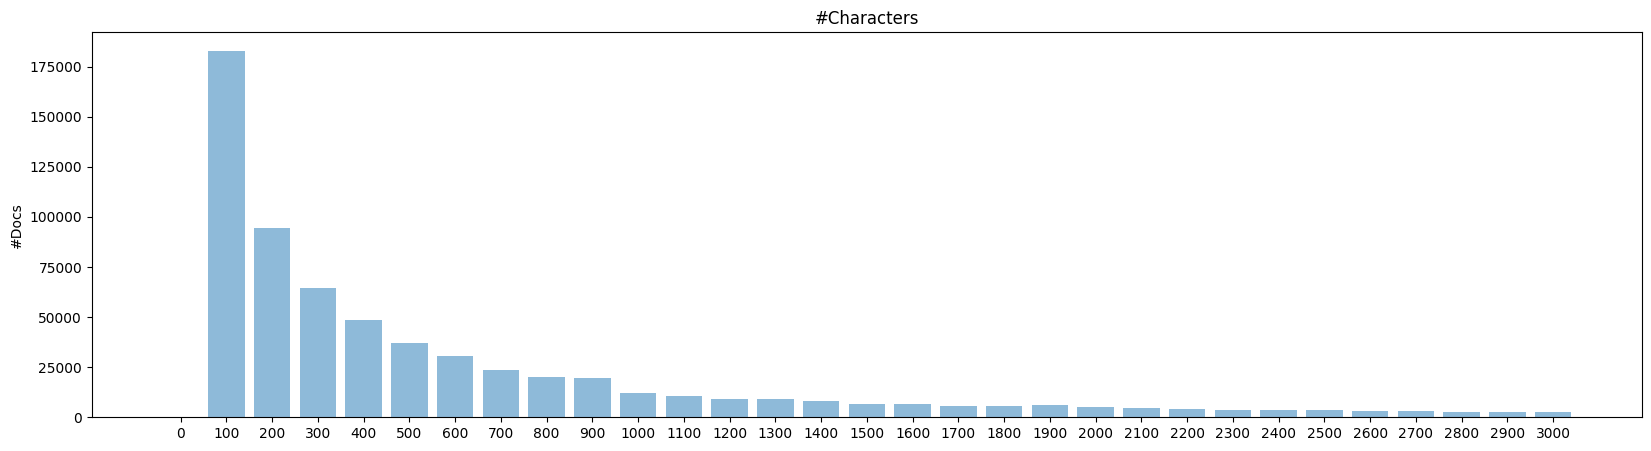

In [ ]:
import requests
import matplotlib.pyplot as plt
import numpy as np

params = {
    "facet.range":"size_i",
    "facet.range.start":"0",
    "facet.range.end":"3001",
    "facet.range.gap":"100",
    "facet":"on",
    "q":"*:*"
}

url="http://librairy.linkeddata.es/data/tbfy/select"
resp = requests.get(url=url, params=params)
data = resp.json()
facet_data = data['facet_counts']['facet_ranges']['size_i']['counts']

sizes = [size for size in facet_data if isinstance(size, str)]
y_pos = np.arange(len(sizes))
frequencies = [freq for freq in facet_data if isinstance(freq, int)]
plt.bar(y_pos, frequencies, align='center', alpha=0.5)

plt.xticks(y_pos, sizes)
plt.ylabel('#Docs')
plt.title('#Characters')
plt.rcParams["figure.figsize"] = [20, 5]

# What does **SearchAPI** offer me?

**SearchAPI** finds *similar texts* regardless of the *language*. 

So if we consider **organizations** and **contracts** rather than only texts, SearchAPI helps us **find organizations that have participated in contracts related to a given description**.

In [ ]:
#@title Enter a description 

text = 'Food consumption data are essential for assessing how exposed people are to potential risks in the food chain.' #@param {type:"string"}

print("reference text updated")

reference text updated


## Texts related across languages

We can use the [Search API](https://github.com/TBFY/search-API) service to search for tenders related to that procurement text:

In [ ]:
import requests

def retrieve_documents(request):
  base_url = 'https://tbfy.librairy.linkeddata.es/search-api'
  resp = requests.post(base_url+'/items', json=request)
  if resp.status_code != 200:
    # This means something went wrong.
    print('POST /items/ {}'.format(resp.status_code))
    pass
  return resp.json()    
  

def search_documents(request):
  i=1
  for document in retrieve_documents(request):
    print('[{}] {}'.format(i, document))
    i+=1  

request = {"source": "tender", "size": "10", "text" : text }
search_documents(request)

[1] {'id': 'ocds-0c46vo-0020-sandwellmbc_2832_sandwellmbc_2832', 'name': 'Quotation for Official Food Control Inspectons 2019/20', 'score': 2888.64453125}
[2] {'id': 'ocds-0c46vo-0022-FEB327117_FEB327117', 'name': 'Food Hygene Inspections', 'score': 2888.64453125}
[3] {'id': 'ocds-0c46vo-0022-NOV317039_NOV317039', 'name': 'tFood Hygiene Inspections', 'score': 2888.64453125}
[4] {'id': 'ocds-0c46vo-0005-41454_41454', 'name': 'Rapid Evidence Assessment to understand Consumer Attitudes and Behaviours', 'score': 2888.64453125}
[5] {'id': 'ocds-0c46vo-0005-42790_42790', 'name': 'Repatriating EU Food Safety Regulation: Assessing the Impact on UK Business', 'score': 2888.64453125}
[6] {'id': 'ocds-0c46vo-0005-43200_43200', 'name': 'FS307029 - Future Consumer – Food and Generation Z', 'score': 2888.64453125}
[7] {'id': 'ocds-0c46vo-0133-183447-2020_183447-2020_td', 'name': 'DIN 18353 Estricharbeiten', 'score': 2888.64453125}
[8] {'id': 'ocds-0c46vo-0133-045906-2020_045906-2020_td', 'name': 'Ac

The above search was tuned to retrieve documents describing tenders (i.e `source = tender`, that are related to a given text (i.e. `text='procurement_text'`), and only the top 10 were retrieved (i.e. `size=10`).

Each search result contains the document identifier, the name and a numerical value to illustrate the level of relationship to the reference text (e.g. `'score': 2794.13`).

The search service can be currently filtered by the following parameters: `size`, `source`, `terms`, `name` and `lang`. **All of them can be freely combined.**

#### Filtering by language

The language parameter `lang` follows the [ISO 639-1 Code](https://www.iso.org/iso-639-language-codes.html). The service currently supports the following languages: English (`en`), Spanish (`es`), French(`fr`), Italian(`it`) and Portuguese(`pt`).

Let's now search for related documents written in Spanish:

In [ ]:
request = {"source": "tender", "size": "10", "text" : text, "lang": "es" }
search_documents(request)

[1] {'id': 'ocds-0c46vo-0133-253105-2019_253105-2019_td', 'name': 'Contrato de servicio de catering en las escuelas infantiles municipales de Almuñécar', 'score': 2819.64599609375}
[2] {'id': 'ocds-0c46vo-0133-260820-2019_260820-2019_td', 'name': 'Suministro de productos farmacéuticos para la fluidoterapia, soluciones para nutriciones parenterales y soluciones de irrigación', 'score': 2819.64599609375}
[3] {'id': 'ocds-0c46vo-0133-231669-2019_231669-2019_td', 'name': 'Contrato AM suministro (CCA. 6L3LVFR)', 'score': 2819.64599609375}
[4] {'id': 'ocds-0c46vo-0133-022081-2019_022081-2019_td', 'name': 'Servicio de monitores y acompañamiento pedagógico y nutricional para el fomento de la alimentación saludable en la campaña escolar «5 al día» y en el campus de verano «Refréscate con 5 al día»', 'score': 2819.64599609375}
[5] {'id': 'ocds-0c46vo-0321-612544_612544', 'name': 'AMT-2019-0060:Servizo  de desenvolvemento, mantemento evolutivo e soporte dun sistema de información de xestión de pr

#### Filtering by source

Currently, both the tender descriptions retrieved from the TBFY Knowledge-Graph (i.e. `source=tender`) and the legal texts published in the JRC-Acquis dataset (i.e. `source=jrc`) are available through the web service . 

If the `source` parameter is missing, no filtering is done:

In [ ]:
request = {"size": "10", "text" : text }
search_documents(request)

[1] {'id': 'ocds-0c46vo-0133-105983-2020_105983-2020_td', 'name': 'Servicii de elaborare documentații tehnico-economice etapa proiect pentru autorizarea executării lucrărilor (PAC), proiect tehnic de execuție (PTE) și detalii de executie (DE), asistență tehnică din partea proiectantului, precum și furnizarea de echipamente specifice și execuția lucrărilor pentru proiectul: „Implementare sistem management inteligent al traficului în [...] detalii pe www.e-licitatie.ro', 'score': 2887.548583984375}
[2] {'id': 'jrc31997R0258-en', 'name': 'Regulation (EC) No 258/97 of the European Parliament and of the Council of 27 January 1997 concerning novel foods and novel food ingredients', 'score': 2826.83447265625}
[3] {'id': 'jrc31996L0077-en', 'name': 'Commission Directive 96/77/EC of 2 December 1996 laying down specific purity criteria on food additives other than colours and sweeteners (Text with EEA relevance)', 'score': 2826.83447265625}
[4] {'id': 'jrc31996L0085-en', 'name': 'Directive 96/85

We can search through tenders (i.e. `source=tender`):

In [ ]:
request = {"source":"tender", "size": "10", "text" : text }
search_documents(request)

[1] {'id': 'ocds-0c46vo-0020-sandwellmbc_2832_sandwellmbc_2832', 'name': 'Quotation for Official Food Control Inspectons 2019/20', 'score': 2888.64453125}
[2] {'id': 'ocds-0c46vo-0022-FEB327117_FEB327117', 'name': 'Food Hygene Inspections', 'score': 2888.64453125}
[3] {'id': 'ocds-0c46vo-0022-NOV317039_NOV317039', 'name': 'tFood Hygiene Inspections', 'score': 2888.64453125}
[4] {'id': 'ocds-0c46vo-0005-41454_41454', 'name': 'Rapid Evidence Assessment to understand Consumer Attitudes and Behaviours', 'score': 2888.64453125}
[5] {'id': 'ocds-0c46vo-0005-42790_42790', 'name': 'Repatriating EU Food Safety Regulation: Assessing the Impact on UK Business', 'score': 2888.64453125}
[6] {'id': 'ocds-0c46vo-0005-43200_43200', 'name': 'FS307029 - Future Consumer – Food and Generation Z', 'score': 2888.64453125}
[7] {'id': 'ocds-0c46vo-0133-183447-2020_183447-2020_td', 'name': 'DIN 18353 Estricharbeiten', 'score': 2888.64453125}
[8] {'id': 'ocds-0c46vo-0133-045906-2020_045906-2020_td', 'name': 'Ac

Or among European Union legal texts (i.e `source=jrc`):

In [ ]:
request = {"source":"jrc", "size": "10", "text" : text }
search_documents(request)

[1] {'id': 'jrc31997R0258-en', 'name': 'Regulation (EC) No 258/97 of the European Parliament and of the Council of 27 January 1997 concerning novel foods and novel food ingredients', 'score': 2826.83447265625}
[2] {'id': 'jrc31996L0077-en', 'name': 'Commission Directive 96/77/EC of 2 December 1996 laying down specific purity criteria on food additives other than colours and sweeteners (Text with EEA relevance)', 'score': 2826.83447265625}
[3] {'id': 'jrc31996L0085-en', 'name': 'Directive 96/85/EC of the European Parliament and of the Council of 19 December 1996 amending Directive 95/2/EC on food additives other than colours and sweeteners', 'score': 2826.83447265625}
[4] {'id': 'jrc31995L0002-en', 'name': 'European Parliament and Council Directive No 95/2/EC of 20 February 1995 on food additives other than colours and sweeteners', 'score': 2826.83447265625}
[5] {'id': 'jrc32004L0006-en', 'name': 'Commission Directive 2004/6/EC of 20 January 2004 derogating from Directive 2001/15/EC to 

In any case, the search can also be filtered by a particular language, for example French (i.e. `lang=fr`):

In [ ]:
request = {"lang": "fr", "source":"jrc", "size": "10", "text" : procurement_text }
search_documents(request)

[1] {'id': 'jrc52005AP0201-fr', 'name': 'Résolution législative du Parlement européen sur la proposition de règlement du Parlement européen et du Conseil concernant les allégations nutritionnelles et de santé portant sur les denrées alimentaires (COM(2003)0424 - C5-0329/2003 - 2003/0165(COD))', 'score': 2819.64599609375}
[2] {'id': 'jrc52005AP0202-fr', 'name': "Résolution législative du Parlement européen sur la proposition de règlement du Parlement européen et du Conseil concernant l'adjonction de vitamines, de substances minérales et de certaines autres substances aux denrées alimentaires (COM(2003)0671 - C5-0538/2003 - 2003/0262(COD))", 'score': 2819.64599609375}
[3] {'id': 'jrc32000L0051-fr', 'name': "Directive 2000/51/CE de la Commission du 26 juillet 2000 modifiant la directive 95/31/CE établissant des critères de pureté spécifique pour les édulcorants pouvant être utilisés dans les denrées alimentaires (Texte présentant de l'intérêt pour l'EEE)", 'score': 2819.64599609375}
[4] {

#### Filtering by Terms

You can also filter by documents containing certain words. Just add the `terms` parameter with the exact sequence of words you want the documents to contain. Please be careful with upper and lower case. 

In [ ]:
request = { "terms": "animal", "source":"tender", "size": "10", "text": text}
search_documents(request)

[1] {'id': 'ocds-0c46vo-0117-146520_146520', 'name': 'Veterinary Services Bantry Area', 'score': 2888.64453125}
[2] {'id': 'ocds-0c46vo-0005-42369_42369', 'name': 'FSA657 - Literature Reviews', 'score': 2822.042236328125}
[3] {'id': 'ocds-0c46vo-0117-151181_151181', 'name': 'Veterinary Services - Bantry Area', 'score': 2822.042236328125}
[4] {'id': 'ocds-0c46vo-0020-birminghamcc_1830_birminghamcc_1830', 'name': 'BWCP201905 - Provision of Specialist Zoo Diets and Nutritional Supplements to Birmingham Wildlife Conservation Park', 'score': 2819.64599609375}
[5] {'id': 'ocds-0c46vo-0022-APR330717_APR330717', 'name': 'Al-Furqan Primary School — Catering Tender', 'score': 2819.64599609375}
[6] {'id': 'ocds-0c46vo-0133-269538-2019_269538-2019_td', 'name': 'Yardleys School — Tender for Catering Services', 'score': 2819.64599609375}
[7] {'id': 'ocds-0c46vo-0133-266296-2019_266296-2019_td', 'name': 'Waverley School and Waverley Studio College — Tender for Catering Services', 'score': 2819.645996

#### Filtering by Name

You can also filter by document name, or part of the name. Again, be careful with upper and lower case.  Just use the `name` parameter

The special character `*` expresses any word in that position. So if you want its name to start with `Security` the filter should be `name=Security*`:


In [ ]:
request = { "name" : "*Certification*", "source":"tender", "size": "10", "text": procurement_text}
search_documents(request)

[1] {'id': 'ocds-0c46vo-0117-160742_160742', 'name': 'Feasibility study on development pathway for a Food Verification & Certification System for the Kilkenny region.', 'score': 2819.64599609375}


## Browse the TBFY Knowledge Graph

The **ID** field returned by **SearchAPI** for each **document** corresponds to the **identifier** used by the **KG**

Once we have the list of related documents, we can directly use their `id` and `source` attributes to read the resource in the Knowledge-Graph.


In [ ]:
def retrieve_tenders(request):
  documents = retrieve_documents(request)
  tenders = []
  for document in documents:
    id = document['id']
    tender = requests.get('https://tbfy.librairy.linkeddata.es/kg-api/tender/'+id).json()
    tenders.append(tender)
  return tenders

def search_tenders(request):
  tenders = retrieve_tenders(request)
  i=1
  for tender in tenders:
    status = "unknown"
    title = "unknown"
    id = "unknown"
    if ('status' in tender):
        status = tender['status']
    if ('title' in tender):        
        title = tender['title']
    if ('id' in tender):
      id = tender['id']
    print('[{}] [{}] "{} ({})"'.format(i,status, title, id))    
    i+=1

print("Search for tenders in KG is ready")

Search for tenders in KG is ready


#### Reading tenders from KG

We can easily read the `status` of the **tenders** in the KG from the **documents** found in the **Search-API**:

In [ ]:
search_tenders({ "source":"tender","size": "10", "text": text})

[1] [active] "Quotation for Official Food Control Inspectons 2019/20 (ocds-0c46vo-0020-sandwellmbc_2832_sandwellmbc_2832)"
[2] [active] "Food Hygene Inspections (ocds-0c46vo-0022-FEB327117_FEB327117)"
[3] [active] "tFood Hygiene Inspections (ocds-0c46vo-0022-NOV317039_NOV317039)"
[4] [complete] "Rapid Evidence Assessment to understand Consumer Attitudes and Behaviours (ocds-0c46vo-0005-41454_41454)"
[5] [active] "Repatriating EU Food Safety Regulation: Assessing the Impact on UK Business (ocds-0c46vo-0005-42790_42790)"
[6] [active] "FS307029 - Future Consumer  Food and Generation Z (ocds-0c46vo-0005-43200_43200)"
[7] [complete] "DIN 18353 Estricharbeiten (ocds-0c46vo-0133-183447-2020_183447-2020_td)"
[8] [complete] "Achat de denres alimentaires pour la restauration scolaire de Vezin-le-Coquet (ocds-0c46vo-0133-045906-2020_045906-2020_td)"
[9] [active] "Feasibility study on development pathway for a Food Verification & Certification System for the Kilkenny region. (ocds-0c46vo-0117-1607

We can **combine** the above **filters** to *improve* searches:

In [ ]:
search_tenders({ "lang":"es", "source":"tender","size": "10", "text": text})

[1] [complete] "Contrato de servicio de catering en las escuelas infantiles municipales de Almucar (ocds-0c46vo-0133-253105-2019_253105-2019_td)"
[2] [unknown] "Suministro de productos farmacuticos para la fluidoterapia, soluciones para nutriciones parenterales y soluciones de irrigacin (ocds-0c46vo-0133-260820-2019_260820-2019_td)"
[3] [complete] "Contrato AM suministro (CCA. 6L3LVFR) (ocds-0c46vo-0133-231669-2019_231669-2019_td)"
[4] [complete] "Servicio de monitores y acompaamiento pedaggico y nutricional para el fomento de la alimentacin saludable en la campaa escolar 5 al da y en el campus de verano Refrscate con 5 al da (ocds-0c46vo-0133-022081-2019_022081-2019_td)"
[5] [active] "AMT-2019-0060:Servizo  de desenvolvemento, mantemento evolutivo e soporte dun sistema de informacin de xestin de prestacin de servizos  da Axencia Galega de Calidade Alimentaria (AGACAL) (ocds-0c46vo-0321-612544_612544)"
[6] [complete] "Suministro agregado de material fungible para el soporte nutricional

#### Reading suppliers of related tenders

In [ ]:
def get_contracting_process(tender_id):
  resp = requests.get('https://tbfy.librairy.linkeddata.es/kg-api/tender/'+tender_id+"/contractingProcess")
  if resp.status_code != 200:
    # This means something went wrong.
    print('GET /tender/contracting_process {}'.format(resp.status_code))
    pass
  return resp.json() 

def get_buyer(contracting_process_id):
  resp = requests.get('https://tbfy.librairy.linkeddata.es/kg-api/contractingProcess/'+contracting_process_id+"/buyer")
  if resp.status_code != 200:
    # This means something went wrong.
    print('GET /contracting_process {}'.format(resp.status_code))
    pass
  return resp.json() 

def search_buyers(request):
  tenders = retrieve_tenders(request)
  i = 1
  for tender in tenders:
    if ('id' not in tender):
        continue
    contracting_processes = get_contracting_process(tender['id'])
    for contracting_process in contracting_processes:
      buyers = get_buyer(contracting_process['id'])
      print(buyers)
      for buyer in buyers:
        #print(buyer)
        if buyer.get('organisation'):
          print('[{}] {} {}'.format(i,buyer['legalName'], buyer['organisation']))
    i+=1

print("KG links are ready")

KG links are ready


Explore the **KG** to identify the **buyers** that have participated in the **tenders** related to our *reference text*:

In [ ]:
request = { "source":"tender","size": "20", "text": text}
search_buyers(request)

[{'legalName': 'Sandwell Metropolitan Borough Council'}]
[{'legalName': 'Vale of Glamorgan Council'}]
[{'legalName': 'Vale of Glamorgan Council', 'contactPoint': {'name': 'Rosalie Malcolm', 'email': 'rmalcolm@valeofglamorgan.gov.uk', 'telephone': '+44 1446709767'}}]
[{'legalName': 'Defra Network eTendering Portal'}]
[{'legalName': 'The Food Standards Agency'}]
[{'legalName': 'The Food Standards Agency'}]
[{'legalName': 'Stadt Rosenheim', 'address': {'street': 'Knigstrae 24', 'postalCode': '83022', 'locality': 'Rosenheim', 'country': 'Germany'}}]
[{'legalName': 'Mairie de Vezin-le-Coquet', 'address': {'street': '8 rue de Rennes', 'postalCode': '35132', 'locality': 'Vezin-le-Coquet', 'country': 'France'}, 'contactPoint': {'name': 'Odile Navarre', 'email': 'onavarre@ville-vezinlecoquet.fr', 'telephone': '+49 299645278'}}]
[{'legalName': 'Kilkenny Leader Partnership Company'}]
[{'legalName': 'Kilkenny Leader Partnership Company'}]
[{'legalName': 'Santa Casa da Misericrdia de Lisboa'}]
[{'l

And they can be **filtered** through any of the filters seen above, for example by **language**:

In [ ]:
request = { "lang":"es", "source":"tender","size": "10", "text": text}
search_buyers(request)

[{'legalName': 'Ayuntamiento De Almucar (Granada)', 'address': {'street': 'Plaza Constitucin, 1', 'postalCode': '18690', 'locality': 'Almucar (Granada)', 'country': 'Spain'}, 'contactPoint': {'name': 'Joaqun Joya Martn', 'email': 'contratacion@almunecar.es', 'telephone': '+34 958838601', 'URL': 'www.contratacion.almunecar.es', 'fax': '+34 958838601'}}]
[{'legalName': 'Consejera de Sanidad del Gobierno de Canarias', 'address': {'street': 'Avenida Juan XXIII, 17, 6 planta', 'postalCode': '35007', 'locality': 'Las Palmas de Gran Canaria', 'country': 'Spain'}}]
[{'legalName': 'Servicio Andaluz de Salud  Hospital Universitario Virgen de las Nieves', 'address': {'street': 'Avenida Fuerzas Armadas, 2, edificio de Gobierno, 3 planta', 'postalCode': '18014', 'locality': 'Granada', 'country': 'Spain'}, 'contactPoint': {'name': 'Plataforma de Logstica Sanitaria de Granada', 'email': 'eloy.povedano.sspa@juntadeandalucia.es', 'telephone': '+34 958020640'}}]
[{'legalName': 'Mercados de Abastecimient